In [ ]:
import pandas as pd
import nltk
import spacy
import plotly.express as px
import plotly.graph_objects as go
import re
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from spacy.lang.en.stop_words import STOP_WORDS as en_stopwords
from spacy.lang.de.stop_words import STOP_WORDS as de_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Load the dataframe into colab
url = 'sec230_tweets_postedby_top100.csv'
df = pd.read_csv(url,index_col=0)
pd.set_option('display.max_colwidth', None)
# remove duplicated values in column 'text'
df.drop_duplicates(subset='text', inplace=True)

In [47]:
# @title Choose a word to see context (PS: if column 'word' is 'None', word is probably used as hashtag in text)
word = "freedom" # @param {type:"string"}

sentences_with_word = df[df['text'].str.contains(word, case=False, na=False)]

# Split the sentences at the word 'x'
split_sentences = sentences_with_word['text'].str.split(word, n=1, expand=True)

# Rename the columns
split_sentences.columns = ['Before', 'After']
split_sentences.insert(1, 'word', word)
split_sentences['word'] = split_sentences.apply(lambda row: 'None' if pd.isnull(row['After']) else row['word'], axis=1)
split_sentences


,Before,word,After
user_username,,,
mmasnick,"RT @BerinSzoka @HawleyMO @sarahjeong @nytopinion @TechFreedom You arguments turn the First Amendment, the plain text of Section 230, and everything FedSoc members say about honoring the text of statutes on its head\r\n\r\nRonald Reagan is rolling in his grave to see Repblicans embrace the Fairness Doctrine. I remind you of what he said in 1987 https://t.co/pPG5GCUwQc",None,None
matthewstoller,@EFFFalcon @bikerglen @blakereid @reckless @sarahjeong @TeamUpturn @daniellecitron There are many excellent reasons to oppose this legislation from Hawley without acting like an unfettered Section 230 liability shield represents,freedom,. It doesn’t.
matthewstoller,The grifters who love Section 230 think free speech means the right to scam lonely women out of cash with fake military accounts. Freedom! https://t.co/E9tV47mJ5Y,None,None
EFF,The,freedom,"that Section 230 afforded to Internet startups to choose their own moderation strategies has led to a variety of options for users—some more restrictive and sanitized, some more laissez-faire. https://t.co/xRfpI4bR5k"
justinamash,Both Donald Trump and Joe Biden want to “revoke” Section 230. This would have a chilling effect on the,freedom,of speech. Using the power of the state to silence speech you don’t like is un-American.
...,...,...,...
Section_230,@ChrisjamesCincy @smerconish @jkosseff @SXMPOTUS @SIRIUSXM @elonmusk @Twitter Section 230 allows for more,freedom,of speech online.\r\n\r\nRemoval of 230 would not revoke any company's right to flag or completely remove content from their sites.\r\n\r\nWithout 230 any user content that has a whiff of getting them sued would be removed and the users likely banned.
Section_230,@LiberalPatriot_ @DanDaGuitRMan @TerjeBrian @Timcast Section 230 allows for more,freedom,"of speech. \r\n\r\nBecause they cannot be held liable for content, they can ultimately leave more up. \r\n\r\nWithout 230 any user content that has a whiff of defamation or libel would be removed.\r\n\r\nWhy do you want less speech online?"
TomFitton,".@ElonMusk (and other Big Tech platforms) should limit content moderation to illegal content (or, at most, a narrow interpretation of moderation under Section 230) and allow users the right to be wrong with the tools to give them the",freedom,to choose what content they see.


In [ ]:
# Count how many tweets were posted by user containing the above searched word 
count = df.index.value_counts()
count_df = pd.DataFrame(count)
count_df


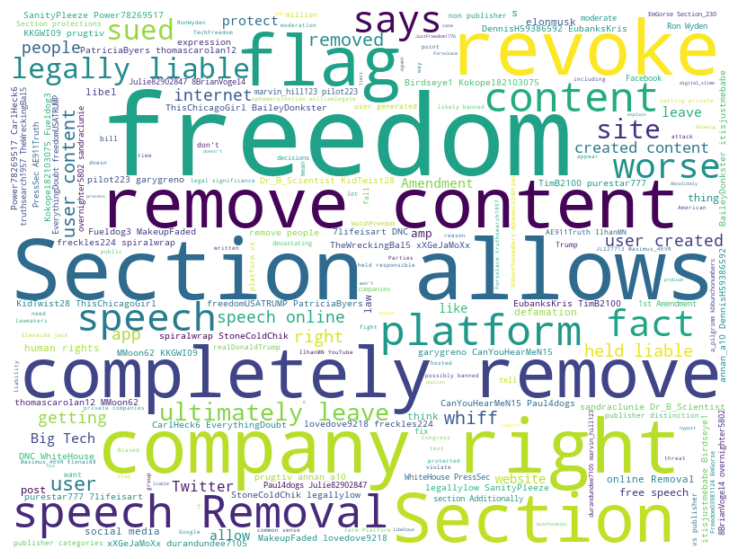

In [44]:
# @title Generate a wordcloud with the most mentioned words in text where the word chosen above is mentioned
# create a wordcloud with words mentioned in column 'text' when word 'x' is found

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords_de = list(de_stopwords)
stopwords_en = list(en_stopwords)
stopwords = stopwords_de + stopwords_en #create a mixed list of stopwords (German and English)
# Edit your list of stopwords manually
add_to_stopwords = ['rt', 'https', 't', 'co']
stopwords = stopwords + add_to_stopwords

sentences_with_word = df[df['text'].str.contains(word, case=False, na=False)]
text = " ".join(sentences_with_word['text'].tolist())

wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
find_df = df[df['text'].str.contains('Every time someone calls out Big Tech', case=False, na=False)]
find_df

,text,lang,conversation_id,possibly_sensitive,created_at,source,author_id,in_reply_to_user_id,user_profile_image_url,user_protected,...,quote_count,user_tweet_count,user_list_count,user_followers_count,user_following_count,sourcetweet_type,sourcetweet_id,sourcetweet_text,sourcetweet_lang,sourcetweet_author_id
user_username,,,,,,,,,,,,,,,,,,,,,
HawleyMO,"Every time someone calls out Big Tech’s bad behavior, they cry about breaking the internet. A year ago,\r\nBig Tech fought changes to CDA 230 that would stop sex trafficking. Now they want to keep discriminating against conservatives. Whatever makes them $$$",en,1141338106550980609,False,2019-06-19T21:22:49.000Z,Twitter for iPhone,2352629311,2.352629e+09,https://pbs.twimg.com/profile_images/1097246042934992898/YqXTdt3v_normal.jpg,False,...,17,6600,3645,1030665,926,NaN,NaN,NaN,NaN,NaN
